# Examples and calculations for congress-bills dataset

## WON'T FINISH COMPUTING, TOO MANY EDGES AND ORDERS...

In [1]:
import copy
import numpy as np
import xgi
import pandas
from itertools import permutations
from itertools import combinations
from collections import Counter, defaultdict

import matplotlib.pyplot as plt

from hyperfunctions import *

In [2]:
H = xgi.load_xgi_data("congress-bills")

In [3]:
len(H.nodes), len(H.edges), H.edges.size.max()

(1718, 282049, 400)

In [4]:
H.remove_edges_from(H.edges.singletons()) # Remove edges with a single node in them
H.remove_nodes_from(H.nodes.isolates())   # There are nodes which only belonged to those singleton edges, we remove them as well.
# Relabel all nodes to start from zero to the current number of nodes
H = xgi.convert_labels_to_integers(H)

H.cleanup(connected=False) #This basically does the same as the three above + checks for multiedges and removes them

In [5]:
len(H.nodes), len(H.edges), H.edges.size.max()

(1718, 104039, 400)

In [6]:
xgi.is_connected(H)

True

## Hypergraph statistics

In [7]:
print("Complete")
len(H.nodes), len(H.edges), H.edges.size.max()

Complete


(1718, 104039, 400)

In [8]:
sizes = defaultdict(int)
for edge in H.edges.members():
    sizes[len(edge)] += 1

<BarContainer object of 342 artists>

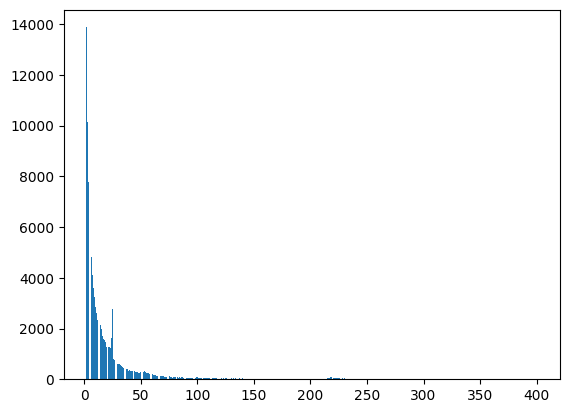

In [9]:
plt.bar(sizes.keys(), sizes.values())

In [10]:
edgedict = H.edges.members(dtype=dict)
#edgedict

In [11]:
Hu2 = H.copy()
for edge, members in edgedict.items():
    if len(members) != 2:
        Hu2.remove_edge(edge)

print(len(Hu2.edges))
        
Hu2.cleanup(connected=True)

print(len(Hu2.edges))

Hu2.remove_nodes_from(Hu2.nodes - xgi.algorithms.largest_connected_component(Hu2))

13871
13871


In [12]:
print("Order 2")
len(Hu2.nodes), len(Hu2.edges), Hu2.edges.size.max(), len(Hu2.nodes)/len(H.nodes)

Order 2


(1642, 13871, 2, 0.9557625145518044)

In [13]:
Hu3 = H.copy()
for edge, members in edgedict.items():
    if len(members) != 3:
        Hu3.remove_edge(edge)

Hu3.cleanup(connected=False)

Hu3.remove_nodes_from(Hu3.nodes - xgi.algorithms.largest_connected_component(Hu3))

In [14]:
print("Order 3")
len(Hu3.nodes), len(Hu3.edges), Hu3.edges.size.max(), len(Hu3.nodes)/len(H.nodes)

Order 3


(1617, 10156, 3, 0.9412107101280559)

In [15]:
Hu4 = H.copy()
for edge, members in edgedict.items():
    if len(members) != 4:
        Hu4.remove_edge(edge)

Hu4.cleanup(connected=False)

Hu4.remove_nodes_from(Hu4.nodes - xgi.algorithms.largest_connected_component(Hu4))

In [16]:
print("Order 4")
len(Hu4.nodes), len(Hu4.edges), Hu4.edges.size.max(), len(Hu4.nodes)/len(H.nodes)

Order 4


(1636, 7764, 4, 0.9522700814901047)

In [17]:
Hu5 = H.copy()
for edge, members in edgedict.items():
    if len(members) != 5:
        Hu5.remove_edge(edge)

Hu5.cleanup(connected=False)

Hu5.remove_nodes_from(Hu5.nodes - xgi.algorithms.largest_connected_component(Hu5))

In [18]:
print("Order 5")
len(Hu5.nodes), len(Hu5.edges), Hu5.edges.size.max(), len(Hu5.nodes)/len(H.nodes)

Order 5


(1632, 5780, 5, 0.9499417927823051)

## Order 2 - pure CEC 

In [19]:
cec = xgi.clique_eigenvector_centrality(H)

df = pandas.DataFrame({"CEC": cec})

## UPHEC at different orders

### Order 2: CEC-like

In [20]:
T2 = uniform_adjacency_combinatorial_tensor(H, m = 2, math_notation = False)

cent2 = HEC_ours(T2, m=2, niter=100000, tol=1e-6, verbose=True)

if cent2[1]:
    df["UPHEC-2"] = cent2[0]

Finished in 14 iterations.


### Order 3 --- NOT DONE --- AFTER HOURS COMPUTING IT WON'T STOP

In [21]:
%%time

T3 = uniform_adjacency_combinatorial_tensor(H, m = 3, math_notation = False)

cent3 = HEC_ours(T3, m=3, niter=100000, tol=1e-6, verbose=True)

cent3real = cent3[0][:-1] #extract last node
cent3real/= np.sum(cent3real) # normalize


if cent3[1]:
    df["UPHEC-3"] = cent3real


KeyboardInterrupt



### Order 4

In [10]:
%%time

T4 = uniform_adjacency_combinatorial_tensor(H, m=4, math_notation = False)

cent4 = HEC_ours(T4, m=4, niter=100000, tol=1e-6, verbose=True)

cent4real = cent4[0][:-1] #extract last node
cent4real/= np.sum(cent4real) # normalize

if cent4[1]:
    df["UPHEC-4"] = cent4real

Finished in 17 iterations.
CPU times: user 6min 48s, sys: 624 ms, total: 6min 49s
Wall time: 6min 49s


### Order 5

In [11]:
%%time

T5 = uniform_adjacency_combinatorial_tensor(H, m=5, math_notation = False)

cent5 = HEC_ours(T5, m=5, niter=100000, tol=1e-6, verbose=True)

cent5real = cent5[0][:-1] #extract last node
cent5real/= np.sum(cent5real) # normalize
len(cent5real)

if cent5[1]:
    df["UPHEC-5"] = cent5real

Finished in 17 iterations.
CPU times: user 15min 51s, sys: 3.07 s, total: 15min 54s
Wall time: 15min 55s


## Uniform HEC at each order (as in Benson's work)

In [12]:
edgedict = H.edges.members(dtype=dict)

### Order 2

In [13]:
Hu2 = H.copy()
for edge, members in edgedict.items():
    if len(members) != 2:
        Hu2.remove_edge(edge)

Hu2.remove_nodes_from(Hu2.nodes - xgi.algorithms.largest_connected_component(Hu2))

cent2unif = xgi.algorithms.h_eigenvector_centrality(Hu2)

for missing_node in range(len(H.nodes)):
    if missing_node not in cent2unif.keys():
        cent2unif[missing_node] = 0

df["HEC-2unif"] = cent2unif

### Order 3

In [14]:
Hu3 = H.copy()
for edge, members in edgedict.items():
    if len(members) != 3:
        Hu3.remove_edge(edge)

Hu3.remove_nodes_from(Hu3.nodes - xgi.algorithms.largest_connected_component(Hu3))

cent3unif = xgi.algorithms.h_eigenvector_centrality(Hu3)

for missing_node in range(len(H.nodes)):
    if missing_node not in cent3unif.keys():
        cent3unif[missing_node] = 0

df["HEC-3unif"] = cent3unif

### Order 4

In [15]:
Hu4 = H.copy()
for edge, members in edgedict.items():
    if len(members) != 4:
        Hu4.remove_edge(edge)

Hu4.remove_nodes_from(Hu4.nodes - xgi.algorithms.largest_connected_component(Hu4))

cent4unif = xgi.algorithms.h_eigenvector_centrality(Hu4)

for missing_node in range(len(H.nodes)):
    if missing_node not in cent4unif.keys():
        cent4unif[missing_node] = 0

df["HEC-4unif"] = cent4unif

### Order 5

In [16]:
Hu5 = H.copy()
for edge, members in edgedict.items():
    if len(members) != 5:
        Hu5.remove_edge(edge)

Hu5.remove_nodes_from(Hu5.nodes - xgi.algorithms.largest_connected_component(Hu5))

cent5unif = xgi.algorithms.h_eigenvector_centrality(Hu5)

for missing_node in range(len(H.nodes)):
    if missing_node not in cent5unif.keys():
        cent5unif[missing_node] = 0

df["HEC-5unif"] = cent5unif

## Alternative uniformization scheme at different orders

### Order 2 == the same as the UPHEC

### Order 3

In [17]:
%%time

T3alt = alternative_uniformization(H, m=3, math_notation=False)

cent3alt = HEC_ours(T3alt, m=3, niter=100000, tol=1e-6, verbose=True)

Finished in 15 iterations.
CPU times: user 2min 13s, sys: 205 ms, total: 2min 13s
Wall time: 2min 13s


In [18]:
if cent3alt[1]:
    df["AltUnif-3"] = cent3alt[0]

### Order 4

In [19]:
%%time

T4alt = alternative_uniformization(H, m=4, math_notation=False)

cent4alt = HEC_ours(T4alt, m=4, niter=100000, tol=1e-6, verbose=True)

if cent4alt[1]:
    df["AltUnif-4"] = cent4alt[0]

Finished in 19 iterations.
CPU times: user 8min 39s, sys: 1.32 s, total: 8min 40s
Wall time: 8min 41s


### Orden 5

In [20]:
%%time 

T5alt = alternative_uniformization(H, m=5, math_notation=True)

cent5alt = HEC_ours(T5alt, m=5, niter=100000, tol=1e-6, verbose=True)

if cent5alt[1]:
    df["AltUnif-5"] = cent5alt[0]

Finished in 19 iterations.
CPU times: user 32min, sys: 6.59 s, total: 32min 6s
Wall time: 32min 9s


## Save everything

In [21]:
#df1 = pandas.read_csv("Output/tags_ask_ubuntu_dataframe.csv")

In [22]:
#df2 = df1.join(df)

In [23]:
#df2.to_csv("Output/tags_ask_ubuntu_dataframe.csv", index=False)

In [24]:
#df2